In [1]:
#Basic Packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization
import seaborn as sns # Advance Data Visualization
%matplotlib inline

#OS packages
import os

#Encoding Packages
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Scaling Packages
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Data Modelling Packages
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state=294,sampling_strategy='not majority')

import sklearn.metrics
from sklearn.model_selection import train_test_split

#Model Packages
import lightgbm as lgb

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df_Train = pd.read_csv('train.csv')
df_Test = pd.read_csv('test.csv')

In [5]:
print(np.intersect1d(df_Train['case_id'], df_Test['case_id']).shape[0]/df_Train['case_id'].nunique())
common_ids = len(set(df_Test['case_id'].unique()).intersection(set(df_Train['case_id'].unique())))

print("Common IDs : ",common_ids)

# No - Data Leak between Train and Test !

print("Unique IDs : ",df_Test.shape[0] - common_ids)

0.0
Common IDs :  0
Unique IDs :  26603


In [6]:
print(np.intersect1d(df_Train['patientid'], df_Test['patientid']).shape[0]/df_Train['patientid'].nunique())
common_ids = len(set(df_Test['patientid'].unique()).intersection(set(df_Train['patientid'].unique())))

print("Common IDs : ",common_ids)

# No - Data Leak between Train and Test !

print("Unique IDs : ",df_Test.shape[0] - common_ids)

0.0
Common IDs :  0
Unique IDs :  26603


In [7]:
df_Train.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397.0,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397.0,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50


In [8]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12605 entries, 0 to 12604
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   case_id                            12605 non-null  int64  
 1   Hospital_code                      12605 non-null  int64  
 2   Hospital_type_code                 12605 non-null  object 
 3   City_Code_Hospital                 12605 non-null  int64  
 4   Hospital_region_code               12605 non-null  object 
 5   Available Extra Rooms in Hospital  12605 non-null  int64  
 6   Department                         12605 non-null  object 
 7   Ward_Type                          12604 non-null  object 
 8   Ward_Facility_Code                 12604 non-null  object 
 9   Bed Grade                          12602 non-null  float64
 10  patientid                          12604 non-null  float64
 11  City_Code_Patient                  12464 non-null  flo

In [9]:
df_Train.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,12605.000000,12605.000000,12605.000000,12605.000000,12602.000000,12604.000000,12464.000000,12604.000000,12604.000000
mean,6303.000000,18.750179,4.768663,3.087902,2.654023,66315.630911,6.961088,3.297683,4973.377896
std,3638.894406,8.722540,3.217339,1.142657,0.860454,37911.508538,4.362038,1.827590,1057.410795
min,1.000000,1.000000,1.000000,1.000000,1.000000,170.000000,1.000000,0.000000,1870.000000
25%,3152.000000,11.000000,2.000000,2.000000,2.000000,33782.000000,4.000000,2.000000,4293.000000
50%,6303.000000,21.000000,5.000000,3.000000,3.000000,67186.500000,8.000000,3.000000,4845.000000
75%,9454.000000,26.000000,7.000000,4.000000,3.000000,98744.000000,8.000000,4.000000,5492.250000
max,12605.000000,32.000000,13.000000,10.000000,4.000000,131536.000000,34.000000,24.000000,10314.000000


In [10]:
df_Train.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [11]:
print('Shape of Train Data: ', df_Train.shape)
print('Shape of Test Data: ', df_Test.shape)

Shape of Train Data:  (12605, 18)
Shape of Test Data:  (26603, 17)


In [12]:
print('Null values in Train Data: \n', df_Train.isnull().sum())

Null values in Train Data: 
 case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              1
Ward_Facility_Code                     1
Bed Grade                              3
patientid                              1
City_Code_Patient                    141
Type of Admission                      1
Severity of Illness                    1
Visitors with Patient                  1
Age                                    1
Admission_Deposit                      1
Stay                                   1
dtype: int64


In [13]:
print('Null Values in Test Data: \n', df_Test.isnull().sum())

Null Values in Test Data: 
 case_id                                0
Hospital_code                          1
Hospital_type_code                     1
City_Code_Hospital                     1
Hospital_region_code                   1
Available Extra Rooms in Hospital      1
Department                             1
Ward_Type                              1
Ward_Facility_Code                     1
Bed Grade                              6
patientid                              1
City_Code_Patient                    268
Type of Admission                      1
Severity of Illness                    1
Visitors with Patient                  1
Age                                    1
Admission_Deposit                      1
dtype: int64


In [14]:
print('Total Count of the Prediction Output Column Stay Variable: \n', df_Train['Stay'].value_counts())

Total Count of the Prediction Output Column Stay Variable: 
 21-30                 3744
11-20                 2643
31-40                 2204
51-60                 1549
0-10                   639
71-80                  526
41-50                  494
More than 100 Days     310
81-90                  245
91-100                 129
61-70                  121
Name: Stay, dtype: int64


In [15]:
df_Train['Stay'].value_counts()

21-30                 3744
11-20                 2643
31-40                 2204
51-60                 1549
0-10                   639
71-80                  526
41-50                  494
More than 100 Days     310
81-90                  245
91-100                 129
61-70                  121
Name: Stay, dtype: int64

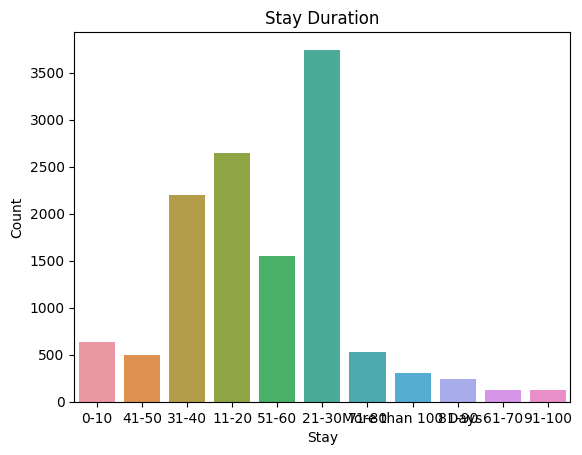

In [16]:
sns.countplot(x='Stay',data=df_Train)
plt.xlabel("Stay")
plt.ylabel("Count")
plt.title("Stay Duration")
plt.show()

In [17]:
df_Train['Hospital_code'].value_counts()

26    1532
23     834
28     787
14     732
19     692
27     622
6      600
11     569
12     513
32     501
10     500
9      483
25     471
29     426
15     351
21     324
24     307
1      305
17     252
2      231
3      224
13     212
30     201
31     169
22     168
8      142
5      122
18     108
16      95
20      55
4       49
7       28
Name: Hospital_code, dtype: int64

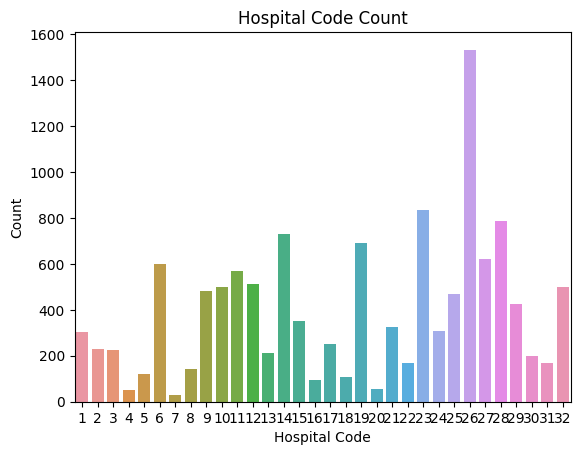

In [18]:
sns.countplot(x='Hospital_code',data=df_Train)
plt.xlabel("Hospital Code")
plt.ylabel("Count")
plt.title("Hospital Code Count")
plt.show()

In [19]:
df_Train['Hospital_type_code'].value_counts()

a    5137
b    2943
c    1737
e    1223
d     896
f     501
g     168
Name: Hospital_type_code, dtype: int64

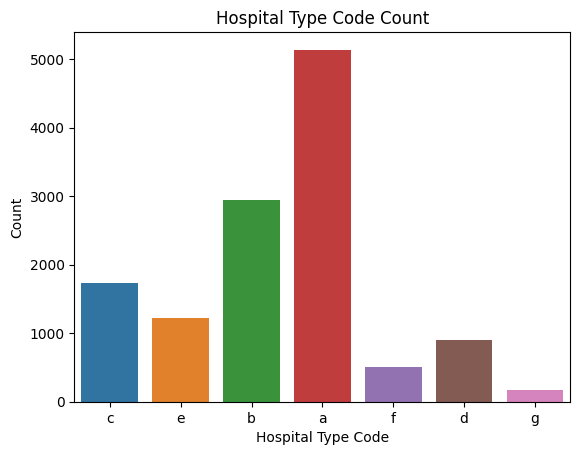

In [20]:
sns.countplot(x='Hospital_type_code',data=df_Train)
plt.xlabel("Hospital Type Code")
plt.ylabel("Count")
plt.title("Hospital Type Code Count")
plt.show()

In [21]:
df_Train['City_Code_Hospital'].value_counts()

1     2384
2     2156
6     1434
7     1314
5     1277
9     1182
3     1155
11     787
4      503
10     305
13     108
Name: City_Code_Hospital, dtype: int64

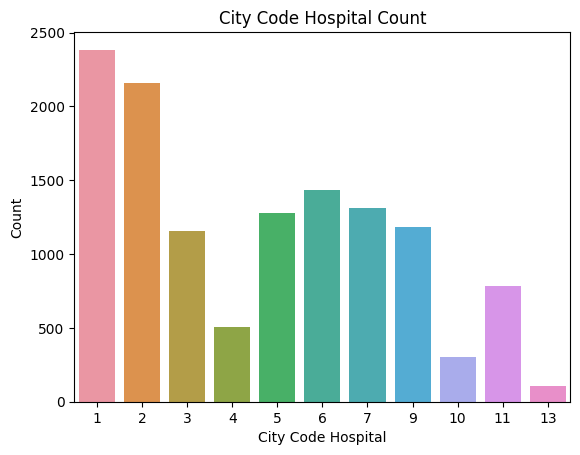

In [22]:
sns.countplot(x='City_Code_Hospital',data=df_Train)
plt.xlabel("City Code Hospital")
plt.ylabel("Count")
plt.title("City Code Hospital Count")
plt.show()

In [23]:

df_Train['Hospital_region_code'].value_counts()

X    5108
Y    5065
Z    2432
Name: Hospital_region_code, dtype: int64

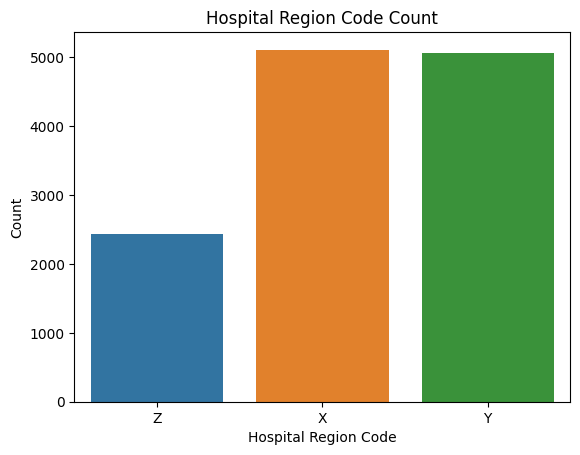

In [24]:
sns.countplot(x='Hospital_region_code',data=df_Train)
plt.xlabel("Hospital Region Code")
plt.ylabel("Count")
plt.title("Hospital Region Code Count")
plt.show()


In [25]:
df_Train['Available Extra Rooms in Hospital'].value_counts()

2     4448
3     3598
4     3296
5      627
6      260
1      224
7      103
8       35
9       11
10       3
Name: Available Extra Rooms in Hospital, dtype: int64

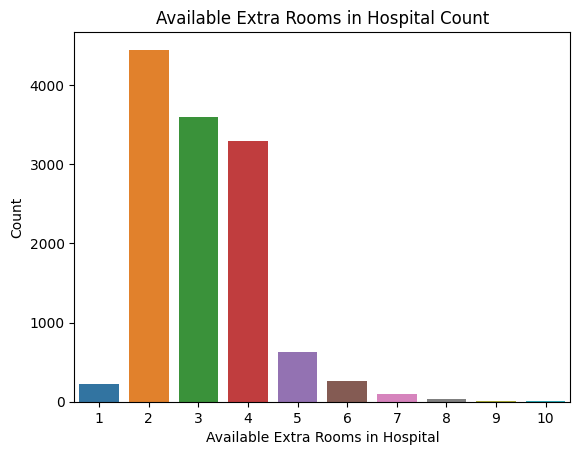

In [26]:
sns.countplot(x='Available Extra Rooms in Hospital',data=df_Train)
plt.xlabel("Available Extra Rooms in Hospital")
plt.ylabel("Count")
plt.title("Available Extra Rooms in Hospital Count")
plt.show()

In [27]:
df_Train['Department'].value_counts()

gynecology            9500
anesthesia            1452
radiotherapy          1226
TB & Chest disease     379
surgery                 48
Name: Department, dtype: int64

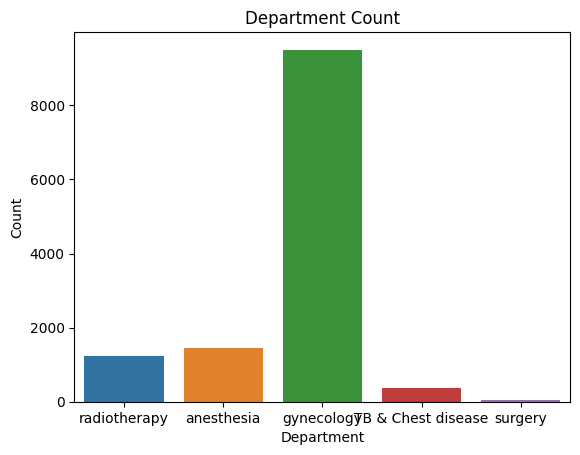

In [28]:
sns.countplot(x='Department',data=df_Train)
plt.xlabel("Department")
plt.ylabel("Count")
plt.title("Department Count")
plt.show()

In [29]:
df_Train['Ward_Type'].value_counts()

R    5219
Q    3915
S    3172
P     213
T      85
Name: Ward_Type, dtype: int64

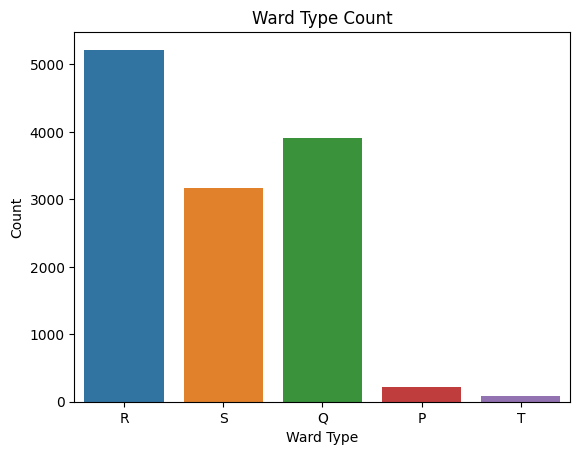

In [30]:
sns.countplot(x='Ward_Type',data=df_Train)
plt.xlabel("Ward Type")
plt.ylabel("Count")
plt.title("Ward Type Count")
plt.show()

In [31]:
df_Train['Ward_Facility_Code'].value_counts()

F    4142
E    2384
D    2156
B    1595
C    1314
A    1013
Name: Ward_Facility_Code, dtype: int64

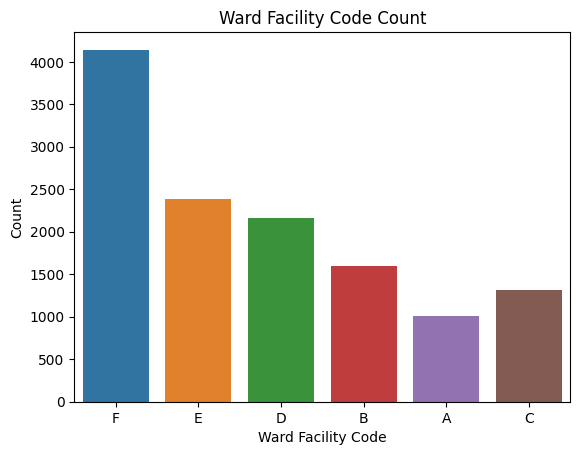

In [32]:
sns.countplot(x='Ward_Facility_Code',data=df_Train)
plt.xlabel("Ward Facility Code")
plt.ylabel("Count")
plt.title("Ward Facility Code Count")
plt.show()

In [33]:
df_Train['Bed Grade'].value_counts()

2.0    4860
3.0    4503
4.0    2326
1.0     913
Name: Bed Grade, dtype: int64

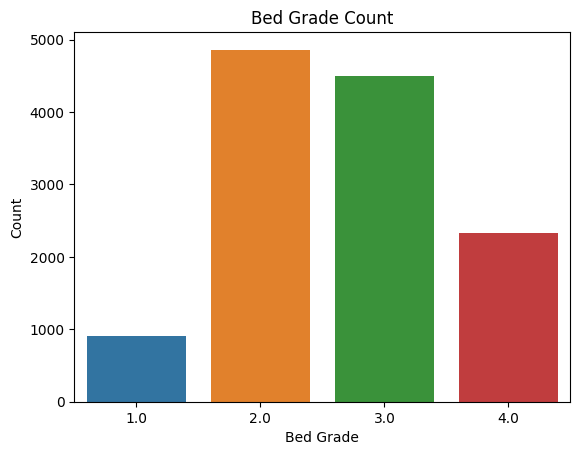

In [34]:
sns.countplot(x='Bed Grade',data=df_Train)
plt.xlabel("Bed Grade")
plt.ylabel("Count")
plt.title("Bed Grade Count")
plt.show()

In [35]:
df_Train['patientid'].value_counts()

126596.0    29
38785.0     18
42669.0     18
10224.0     17
88332.0     16
            ..
104460.0     1
15246.0      1
75296.0      1
17169.0      1
125618.0     1
Name: patientid, Length: 2426, dtype: int64

In [36]:
df_Train['patientid'].nunique()


2426

In [37]:
df_Train['patientid'].unique()

array([ 31397.,  63418.,   8088., ...,  77153., 105783.,     nan])

In [38]:
df_Train['City_Code_Patient'].value_counts()

8.0     5291
1.0     1299
2.0     1211
5.0     1037
4.0      707
7.0      705
9.0      608
15.0     351
6.0      186
10.0     183
12.0     157
3.0      117
14.0     116
23.0      89
20.0      67
11.0      51
13.0      51
26.0      48
27.0      47
21.0      34
16.0      23
18.0      20
25.0      18
24.0      16
28.0      10
22.0      10
19.0       5
31.0       3
34.0       2
32.0       2
Name: City_Code_Patient, dtype: int64

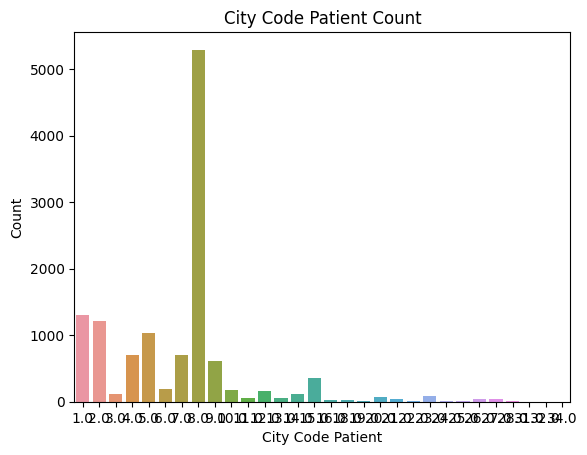

In [39]:
sns.countplot(x='City_Code_Patient',data=df_Train)
plt.xlabel("City Code Patient")
plt.ylabel("Count")
plt.title("City Code Patient Count")
plt.show()

In [40]:
df_Train['Type of Admission'].value_counts()

Trauma       7125
Emergency    4153
Urgent       1326
Name: Type of Admission, dtype: int64

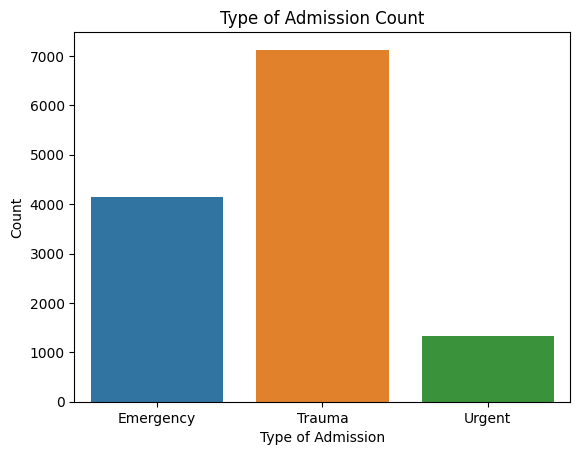

In [41]:
sns.countplot(x='Type of Admission',data=df_Train)
plt.xlabel("Type of Admission")
plt.ylabel("Count")
plt.title("Type of Admission Count")
plt.show()

In [42]:
df_Train['Severity of Illness'].value_counts()

Moderate    7218
Extreme     3070
Minor       2316
Name: Severity of Illness, dtype: int64

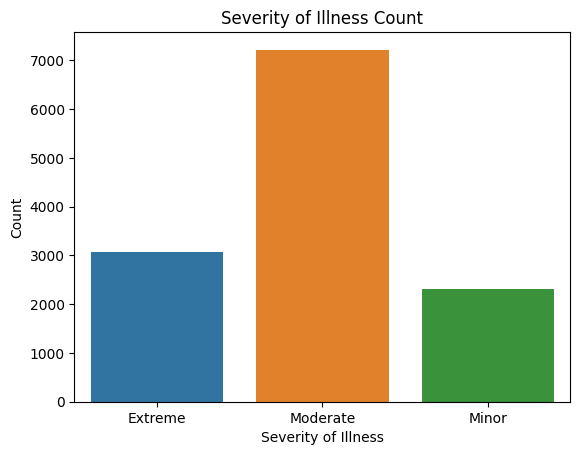

In [43]:
sns.countplot(x='Severity of Illness',data=df_Train)
plt.xlabel("Severity of Illness")
plt.ylabel("Count")
plt.title("Severity of Illness Count")
plt.show()

In [44]:
df_Train['Visitors with Patient'].value_counts()

2.0     5687
4.0     3144
3.0     2021
6.0      832
5.0      377
8.0      190
7.0       78
9.0       71
1.0       57
10.0      38
15.0      32
12.0      30
11.0      18
24.0       8
16.0       8
13.0       6
14.0       4
20.0       2
0.0        1
Name: Visitors with Patient, dtype: int64

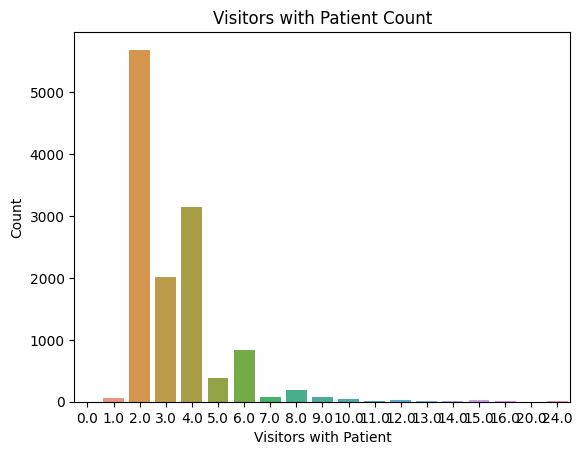

In [45]:
sns.countplot(x='Visitors with Patient',data=df_Train)
plt.xlabel("Visitors with Patient")
plt.ylabel("Count")
plt.title("Visitors with Patient Count")
plt.show()

In [46]:
df_Train['Age'].value_counts()


31-40     2375
41-50     2228
71-80     2061
51-60     1776
61-70     1596
21-30     1335
81-90      558
11-20      500
0-10       118
91-100      57
Name: Age, dtype: int64

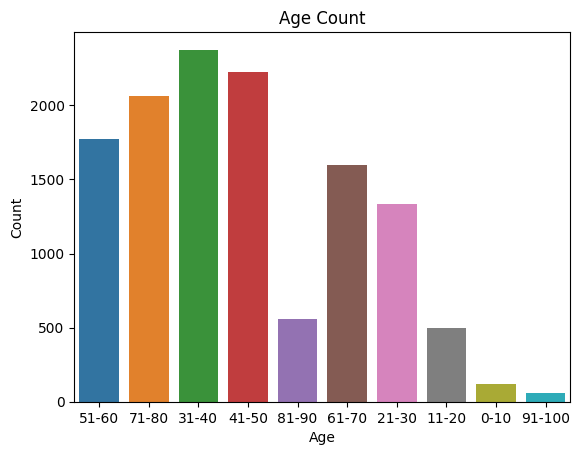

In [47]:
sns.countplot(x='Age',data=df_Train)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Count")
plt.show()

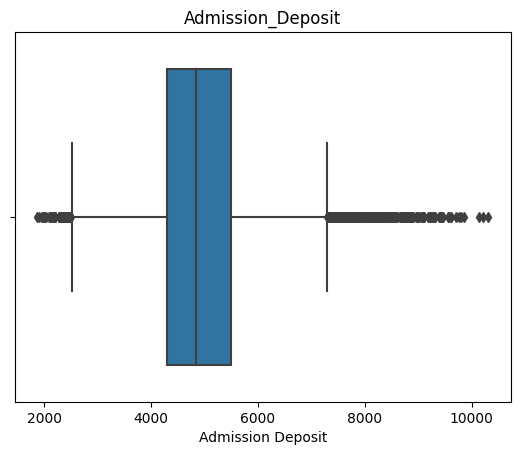

In [48]:
sns.boxplot(x=df_Train['Admission_Deposit'])
plt.xlabel("Admission Deposit")
plt.title("Admission_Deposit")
plt.show()

In [49]:
df_Train.drop_duplicates(keep='first', inplace=True)

In [50]:
df_Train['is_train'] = 1
df_Test['is_train'] = 0

#df_Frames = [df_Train,df_Test]
df_Total = pd.concat([df_Train, df_Test])

In [51]:
print('Null values in Total Data: \n', df_Total.isnull().sum())

Null values in Total Data: 
 case_id                                  0
Hospital_code                            1
Hospital_type_code                       1
City_Code_Hospital                       1
Hospital_region_code                     1
Available Extra Rooms in Hospital        1
Department                               1
Ward_Type                                2
Ward_Facility_Code                       2
Bed Grade                                9
patientid                                2
City_Code_Patient                      409
Type of Admission                        2
Severity of Illness                      2
Visitors with Patient                    2
Age                                      2
Admission_Deposit                        2
Stay                                 26604
is_train                                 0
dtype: int64


In [52]:
df_Total['Bed Grade']=df_Total['Bed Grade'].fillna(method="ffill",axis=0)
df_Total['City_Code_Patient']=df_Total['City_Code_Patient'].fillna(method="ffill",axis=0)

In [53]:
df_Total['Bill_per_patient'] = df_Total.groupby('patientid')['Admission_Deposit'].transform('sum')
df_Total['Min_Severity_of_Illness'] = df_Total.groupby('patientid')['Severity of Illness'].transform('min')


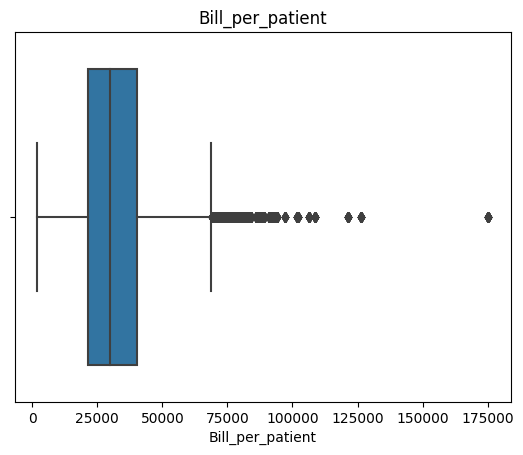

In [54]:
sns.boxplot(x=df_Total['Bill_per_patient'])
plt.xlabel("Bill_per_patient")
plt.title("Bill_per_patient")
plt.show()

In [55]:
df_Total.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,is_train,Bill_per_patient,Min_Severity_of_Illness
0,1,8.0,c,3.0,Z,3.0,radiotherapy,R,F,2.0,...,7.0,Emergency,Extreme,2.0,51-60,4911.0,0-10,1,83314.0,Extreme
1,2,2.0,c,5.0,Z,2.0,radiotherapy,S,F,2.0,...,7.0,Trauma,Extreme,2.0,51-60,5954.0,41-50,1,83314.0,Extreme
2,3,10.0,e,1.0,X,2.0,anesthesia,S,E,2.0,...,7.0,Trauma,Extreme,2.0,51-60,4745.0,31-40,1,83314.0,Extreme
3,4,26.0,b,2.0,Y,2.0,radiotherapy,R,D,2.0,...,7.0,Trauma,Extreme,2.0,51-60,7272.0,41-50,1,83314.0,Extreme
4,5,26.0,b,2.0,Y,2.0,radiotherapy,S,D,2.0,...,7.0,Trauma,Extreme,2.0,51-60,5558.0,41-50,1,83314.0,Extreme


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_Total['Hospital_code'] = le.fit_transform(df_Total['Hospital_code'])
df_Total['Hospital_type_code'] = le.fit_transform(df_Total['Hospital_type_code'])
df_Total['City_Code_Hospital'] = le.fit_transform(df_Total['City_Code_Hospital'])
df_Total['Hospital_region_code'] = le.fit_transform(df_Total['Hospital_region_code'])
df_Total['Available Extra Rooms in Hospital'] = le.fit_transform(df_Total['Available Extra Rooms in Hospital'])
df_Total['Department'] = le.fit_transform(df_Total['Department'])
df_Total['Ward_Type'] = le.fit_transform(df_Total['Ward_Type'])
df_Total['Ward_Facility_Code'] = le.fit_transform(df_Total['Ward_Facility_Code'])
df_Total['Bed Grade'] = le.fit_transform(df_Total['Bed Grade'])
df_Total['patientid'] = le.fit_transform(df_Total['patientid'])
df_Total['City_Code_Patient'] = le.fit_transform(df_Total['City_Code_Patient'])
df_Total['Type of Admission'] = le.fit_transform(df_Total['Type of Admission'])
df_Total['Severity of Illness'] = le.fit_transform(df_Total['Severity of Illness'])
df_Total['Visitors with Patient'] = le.fit_transform(df_Total['Visitors with Patient'])
df_Total['Age'] = le.fit_transform(df_Total['Age'])
df_Total['Min_Severity_of_Illness'] = le.fit_transform(df_Total['Min_Severity_of_Illness'])

In [57]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
df_Total[['Admission_Deposit']] = mm_scaler.fit_transform(df_Total[['Admission_Deposit']])
df_Total[['Bill_per_patient']] = mm_scaler.fit_transform(df_Total[['Bill_per_patient']])

In [58]:
df_Total['Admission_Deposit'].describe()

count    39206.000000
mean         0.357297
std          0.121554
min          0.000000
25%          0.279233
50%          0.342178
75%          0.416380
max          1.000000
Name: Admission_Deposit, dtype: float64

In [59]:
df_Train_final = df_Total[df_Total['is_train'] == 1]
df_Test_final = df_Total[df_Total['is_train'] == 0]

In [60]:
df_Train_final

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,...,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,is_train,Bill_per_patient,Min_Severity_of_Illness
0,1,7,2,2,2,3,3,2,5,1,...,6,0,0,2,5,0.352401,0-10,1,0.469363,0
1,2,1,2,4,2,2,3,3,5,1,...,6,1,0,2,5,0.472203,41-50,1,0.469363,0
2,3,9,4,0,0,2,1,3,4,1,...,6,1,0,2,5,0.333333,31-40,1,0.469363,0
3,4,25,1,1,1,2,3,2,3,1,...,6,1,0,2,5,0.623593,41-50,1,0.469363,0
4,5,25,1,1,1,2,3,3,3,1,...,6,1,0,2,5,0.426717,41-50,1,0.469363,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12600,12601,26,0,6,1,4,2,2,2,1,...,7,1,2,4,4,0.259706,51-60,1,0.086363,2
12601,12602,26,0,6,1,4,2,2,2,2,...,7,0,1,3,5,0.301057,11-20,1,0.061747,1
12602,12603,22,0,5,0,4,2,2,5,2,...,7,1,1,2,5,0.260051,21-30,1,0.061747,1
12603,12604,5,0,5,0,4,2,2,5,2,...,7,1,1,2,5,0.259476,21-30,1,0.061747,1


In [61]:
df_Train_final.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay', 'is_train', 'Bill_per_patient',
       'Min_Severity_of_Illness'],
      dtype='object')

In [62]:
x = df_Train_final
x = x.drop(['case_id'], axis=1)
#x = x.drop(['patientid'], axis=1)
x = x.drop(['is_train'], axis=1)
x = x.drop(['Stay'], axis=1)
y = df_Train_final['Stay']
x_pred = df_Test_final
x_pred = x_pred.drop(['case_id'], axis=1)
#x_pred = x_pred.drop(['patientid'], axis=1)
x_pred = x_pred.drop(['is_train'], axis=1)
x_pred = x_pred.drop(['Stay'], axis=1)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.20)

In [64]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.0 MB/s eta 0:00:00


In [65]:
import lightgbm as lgb
import optuna

In [66]:
def objective(trial):
    dtrain = lgb.Dataset(x_train, label=np.ravel(y_train))

    param = {
        #"objective": "multiclass",
        #"metric": "multi_logloss",
        #"num_class": 11,
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100)
        #"n_estimators":trial.suggest_int("n_estimators", 0, 1000),
        #"learning_rate":trial.suggest_int("n_estimators", 0, 99)
    }

    gbm = lgb.train(param, dtrain)
    preds = gbm.predict(x_valid)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(y_valid, pred_labels)
    return accuracy

In [67]:
import lightgbm as lgb
lgb_cl = lgb.LGBMClassifier(boosting_type='gbdt', learning_rate=0.1, n_estimators=50000, importance_type='gain', objective='multiclass', num_boost_round=100,
                            min_child_samples=70, num_leaves=246, #max_depth=5, 
                            lambda_l1=9.62, lambda_l2=0.006, feature_fraction=0.73, bagging_fraction=0.82, bagging_freg=6,
                            #max_bin=60, bagging_faction=0.9, feature_fraction=0.9, subsample_freq=2, scale_pos_weight=2.5, 
                            random_state=294, n_jobs=-1, silent=False) #score accuracy 42.70